<a href="https://colab.research.google.com/github/josephgeorgeMLDL1/Segmentation_UNET_Nucleidata/blob/main/segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import PIL
from PIL import Image
import os
import cv2

2.9.2


In [3]:
! unzip '/content/drive/MyDrive/Dataset/nucleiData.zip' -d '/content/drive/MyDrive/DeepLearning/5--Segmentation'

Archive:  /content/drive/MyDrive/Dataset/nucleiData.zip
   creating: /content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/
   creating: /content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTest/
  inflating: /content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTest/610_gray.pgm  
  inflating: /content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTest/629_gray.pgm  
  inflating: /content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTest/632_mask.pgm  
  inflating: /content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTest/653_mask.pgm  
  inflating: /content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTest/651_mask.pgm  
  inflating: /content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTest/652_gray.pgm  
  inflating: /content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTest/603_mask.pgm  
  inflating: /content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTest/636_mask.pgm  
  inflat

Training data

In [33]:
trainFiles = glob.glob("/content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTrain/*_gray.pgm")

In [34]:
print(trainFiles[:10])

['/content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTrain/205_gray.pgm', '/content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTrain/279_gray.pgm', '/content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTrain/081_gray.pgm', '/content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTrain/210_gray.pgm', '/content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTrain/263_gray.pgm', '/content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTrain/438_gray.pgm', '/content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTrain/136_gray.pgm', '/content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTrain/446_gray.pgm', '/content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTrain/393_gray.pgm', '/content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTrain/363_gray.pgm']


In [35]:
X_train = []
y_train = []

In [36]:
for filePath in trainFiles:
    X_i = Image.open(filePath)
    X_i = np.array(X_i)/255.0
    
    X_train.append(X_i)
    
    y_i = Image.open(filePath.replace("gray", "mask"))
    y_i = np.array(y_i)/255
    
    y_train.append(y_i)

In [31]:
X_train

[array([[0.8745098 , 0.8745098 , 0.86666667, ..., 0.43529412, 0.45882353,
         0.50588235],
        [0.86666667, 0.8745098 , 0.8627451 , ..., 0.51764706, 0.5372549 ,
         0.54117647],
        [0.85882353, 0.85882353, 0.85490196, ..., 0.63529412, 0.54901961,
         0.58823529],
        ...,
        [0.90588235, 0.90196078, 0.77647059, ..., 0.96078431, 0.94901961,
         0.95294118],
        [0.91372549, 0.90588235, 0.90588235, ..., 0.95686275, 0.95294118,
         0.96470588],
        [0.91764706, 0.90196078, 0.90588235, ..., 0.95686275, 0.94901961,
         0.95686275]]),
 array([[0.05882353, 0.05882353, 0.05490196, ..., 0.05882353, 0.05882353,
         0.05882353],
        [0.05490196, 0.05490196, 0.05882353, ..., 0.05882353, 0.0627451 ,
         0.05490196],
        [0.05490196, 0.05882353, 0.05882353, ..., 0.05882353, 0.05882353,
         0.05882353],
        ...,
        [0.05490196, 0.05882353, 0.05882353, ..., 0.05882353, 0.0627451 ,
         0.08235294],
        [0.0

In [39]:
y_train

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 0., ..., 1., 1., 1.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 1., 0., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.]]), array([

In [40]:
X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(600, 128, 128)
(600, 128, 128)


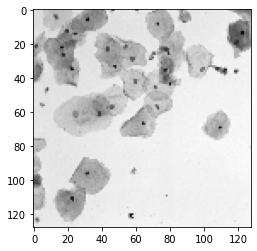

In [42]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

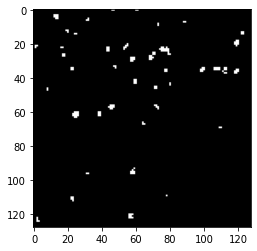

In [43]:
plt.imshow(y_train[0], cmap='gray')
plt.show()

Test data

In [44]:
testFiles = glob.glob("/content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTest/*_gray.pgm")

print(testFiles[:10])

X_test = []
y_test = []

for filePath in testFiles:
    X_i = Image.open(filePath)
    X_i = np.array(X_i)/255.0
    
    X_test.append(X_i)
    
    y_i = Image.open(filePath.replace("gray", "mask"))
    y_i = np.array(y_i)/255
    
    y_test.append(y_i)

['/content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTest/610_gray.pgm', '/content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTest/629_gray.pgm', '/content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTest/652_gray.pgm', '/content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTest/643_gray.pgm', '/content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTest/626_gray.pgm', '/content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTest/640_gray.pgm', '/content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTest/616_gray.pgm', '/content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTest/657_gray.pgm', '/content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTest/623_gray.pgm', '/content/drive/MyDrive/DeepLearning/5--Segmentation/nucleiData/nTest/608_gray.pgm']


In [45]:
X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_test.shape)
print(y_test.shape)

(70, 128, 128)
(70, 128, 128)


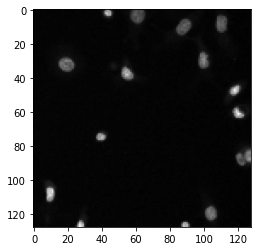

In [46]:
plt.imshow(X_test[1], cmap='gray')
plt.show()

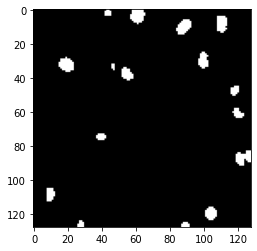

In [47]:
plt.imshow(y_test[1], cmap='gray')
plt.show()


The model requires the input to be 4D

np.newaxis is to add new dimension to the array. The position of the np.newaxis represents where I want to add dimensions.

a([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) : shape is (10,) \

a[:, np.newaxis] : shape is (10,1)\

a[np.newaxis, :] : shape is (1,10)

numpy.repeat(a, repeats, axis=None) # Repeat elements of an array.


In [48]:
X_train = X_train[..., np.newaxis]
y_train = y_train[..., np.newaxis]

In [49]:
print(X_train.shape)
print(y_train.shape)

(600, 128, 128, 1)
(600, 128, 128, 1)


In [50]:
X_test = X_test[..., np.newaxis]
y_test = y_test[..., np.newaxis]

In [51]:
print(X_test.shape)
print(y_test.shape)

(70, 128, 128, 1)
(70, 128, 128, 1)


In [52]:
X_train=np.repeat(X_train,3,-1) #-1 indicates the last dimension, # which indicates the axis along which to repeat values
X_test=np.repeat(X_test,3,-1)

In [53]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

'''
X_train=np.repeat(X_train[..., np.newaxis],3,-1) #-1 indicates the last dimension, 
                                              #which indicates the axis along whic to repeat values
y_train= y_train[..., np.newaxis]
#y_train=np.repeat(y_train[..., np.newaxis],1,-1)
print(X_train.shape)
print(y_train.shape)
'''
'''
X_test = X_test[..., np.newaxis]
y_test = y_test[..., np.newaxis]
print(X_test.shape)
print(y_test.shape)
'''
'''
X_test=np.repeat(X_test[..., np.newaxis],3,-1)
y_test=np.repeat(y_test[..., np.newaxis],1,-1)
print(X_test.shape)
print(y_test.shape)
'''

(600, 128, 128, 3)
(600, 128, 128, 1)
(70, 128, 128, 3)
(70, 128, 128, 1)


'\nX_test=np.repeat(X_test[..., np.newaxis],3,-1)\ny_test=np.repeat(y_test[..., np.newaxis],1,-1)\nprint(X_test.shape)\nprint(y_test.shape)\n'

In [13]:
'''
X_train = X_train[..., np.newaxis]
y_train = y_train[..., np.newaxis]


print(X_train.shape)
print(y_train.shape)
'''
'''
X_train=np.repeat(X_train[..., np.newaxis],3,-1) #-1 indicates the last dimension, 
                                              #which indicates the axis along whic to repeat values
y_train= y_train[..., np.newaxis]
#y_train=np.repeat(y_train[..., np.newaxis],1,-1)
print(X_train.shape)
print(y_train.shape)
'''
'''
X_test = X_test[..., np.newaxis]
y_test = y_test[..., np.newaxis]
print(X_test.shape)
print(y_test.shape)
'''

#X_test=np.repeat(X_test[..., np.newaxis],3,-1)
#y_test=y_test[..., np.newaxis]
#print(X_test.shape)
#print(y_test.shape)

(70, 128, 128, 3, 3)
(70, 128, 128, 1, 1)


New attempt

In [54]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

In [55]:
#https://keras.io/api/applications/

In [56]:
from keras import applications

vgg_model = applications.VGG16(weights='imagenet',
                               include_top=False,
                               input_shape=(128, 128, 3))


In [57]:
# Creating dictionary that maps layer names to the layers
layer_dict = dict([(layer.name, layer) for layer in vgg_model.layers])

In [58]:
layer_dict

{'input_2': <keras.engine.input_layer.InputLayer at 0x7fe4dc278a60>,
 'block1_conv1': <keras.layers.convolutional.conv2d.Conv2D at 0x7fe4806f4eb0>,
 'block1_conv2': <keras.layers.convolutional.conv2d.Conv2D at 0x7fe543ead190>,
 'block1_pool': <keras.layers.pooling.max_pooling2d.MaxPooling2D at 0x7fe4dc278490>,
 'block2_conv1': <keras.layers.convolutional.conv2d.Conv2D at 0x7fe48069baf0>,
 'block2_conv2': <keras.layers.convolutional.conv2d.Conv2D at 0x7fe4dc437880>,
 'block2_pool': <keras.layers.pooling.max_pooling2d.MaxPooling2D at 0x7fe4806f4be0>,
 'block3_conv1': <keras.layers.convolutional.conv2d.Conv2D at 0x7fe4806a2970>,
 'block3_conv2': <keras.layers.convolutional.conv2d.Conv2D at 0x7fe4806eabe0>,
 'block3_conv3': <keras.layers.convolutional.conv2d.Conv2D at 0x7fe4806b2370>,
 'block3_pool': <keras.layers.pooling.max_pooling2d.MaxPooling2D at 0x7fe48071cbe0>,
 'block4_conv1': <keras.layers.convolutional.conv2d.Conv2D at 0x7fe48064ac70>,
 'block4_conv2': <keras.layers.convolutional

In [59]:
l1 = layer_dict['block1_conv2'].output
l2 = layer_dict['block2_conv2'].output
l3 = layer_dict['block3_conv3'].output
l4 = layer_dict['block4_conv3'].output
l5 = layer_dict['block5_conv3'].output
l6_pool= layer_dict['block5_pool'].output

#Upsampling to level 5
u5 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same') (l6_pool)
u5 = concatenate([u5, l5])

c5 = Conv2D(512, (3, 3), activation='relu',  padding='same') (u5)
c5 = Conv2D(512, (3, 3), activation='relu',  padding='same') (c5)
c5 = Conv2D(512, (3, 3), activation='relu',  padding='same') (c5)

#Upsampling to level 4
u4 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same') (c5)
u4 = concatenate([u4, l4])

c4 = Conv2D(512, (3, 3), activation='relu',  padding='same') (u4)
c4 = Conv2D(512, (3, 3), activation='relu',  padding='same') (c4)
c4 = Conv2D(512, (3, 3), activation='relu',  padding='same') (c4)

#Upsampling to level 3

u3 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same') (c4)
u3 = concatenate([u3, l3])

c3 = Conv2D(256, (3, 3), activation='relu',  padding='same') (u3)
c3 = Conv2D(256, (3, 3), activation='relu',  padding='same') (c3)
c3 = Conv2D(256, (3, 3), activation='relu',  padding='same') (c3)

#Upsampling to level 2
u2 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c3)
u2 = concatenate([u2, l2])

c2 = Conv2D(128, (3, 3), activation='relu',  padding='same') (u2)
c2 = Conv2D(128, (3, 3), activation='relu',  padding='same') (c2)

#Upsampling to level 1
u1 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c2)
u1 = concatenate([u1, l1])

c1 = Conv2D(64, (3, 3), activation='relu' ,padding='same') (u1)
c1 = Conv2D(64, (3, 3), activation='relu', padding='same') (c1)

#Final 1*1 convolution 
outputs = Conv2D(1, (1, 1), activation='sigmoid') (c1)

UNet_model = Model(inputs=[vgg_model.input], outputs=[outputs])

In [60]:
UNet_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 128, 128, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 128, 128, 64  36928       ['block1_conv1[0][0]']           
                                )                                                           

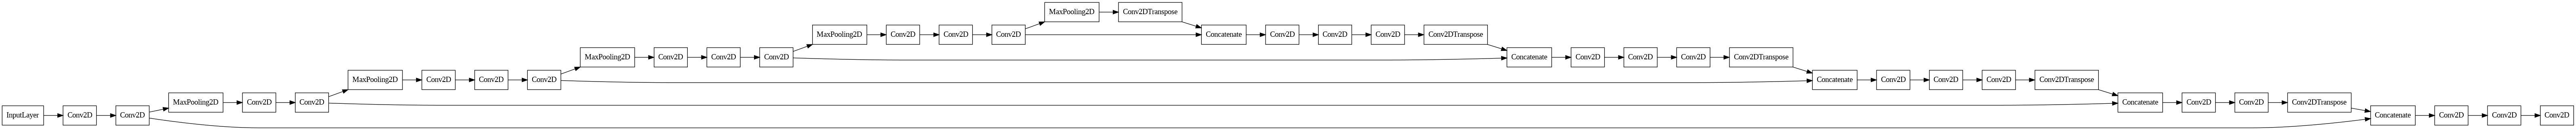

In [61]:
tf.keras.utils.plot_model(
    UNet_model,
    to_file='UNet_model.png',
    show_shapes=False,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=False,
    dpi=96
)

In [62]:
UNet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
history_model = UNet_model.fit(X_train, y_train, validation_split=0.1, batch_size=32, epochs=50)

Epoch 1/50
17/17 [==============================] - 9s 439ms/step - loss: 0.5588 - accuracy: 0.8145 - val_loss: 0.3098 - val_accuracy: 0.8698
Epoch 2/50
17/17 [==============================] - 7s 418ms/step - loss: 0.2590 - accuracy: 0.8874 - val_loss: 0.2064 - val_accuracy: 0.9049
Epoch 3/50
17/17 [==============================] - 7s 421ms/step - loss: 0.1714 - accuracy: 0.9266 - val_loss: 0.1324 - val_accuracy: 0.9458
Epoch 4/50
17/17 [==============================] - 7s 425ms/step - loss: 0.1244 - accuracy: 0.9479 - val_loss: 0.0956 - val_accuracy: 0.9593
Epoch 5/50
17/17 [==============================] - 7s 427ms/step - loss: 0.1058 - accuracy: 0.9559 - val_loss: 0.0967 - val_accuracy: 0.9589
Epoch 6/50
17/17 [==============================] - 7s 428ms/step - loss: 0.1085 - accuracy: 0.9548 - val_loss: 0.0897 - val_accuracy: 0.9635
Epoch 7/50
17/17 [==============================] - 7s 430ms/step - loss: 0.0934 - accuracy: 0.9623 - val_loss: 0.0737 - val_accuracy: 0.9699
Epoch 

In [64]:
testLoss, testAccuracy = UNet_model.evaluate(X_test, y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss, testAccuracy))

3/3 [==============================] - 2s 714ms/step - loss: 0.1244 - accuracy: 0.9531
Test-loss: 0.124434, Test-accuracy: 0.953097


Predicted segmentation (grayscale)

1/1 [==============================] - 1s 1s/step


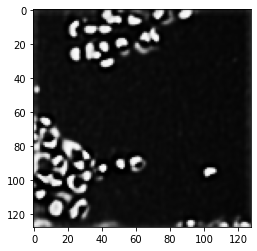

In [65]:
m1 = UNet_model.predict(X_test[10:11])
plt.imshow(np.squeeze(m1), cmap='gray')

Predicted segmentation (binary)

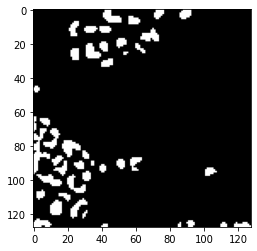

In [66]:
prediciton_t = (m1 > 0.5).astype(np.uint8)
plt.imshow(np.squeeze(prediciton_t), cmap='gray')

Original Input

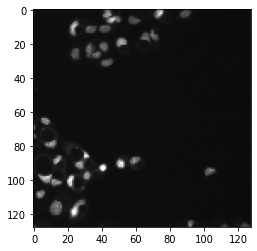

In [67]:
plt.imshow(np.squeeze(X_test[10:11]), cmap='gray')
plt.show()

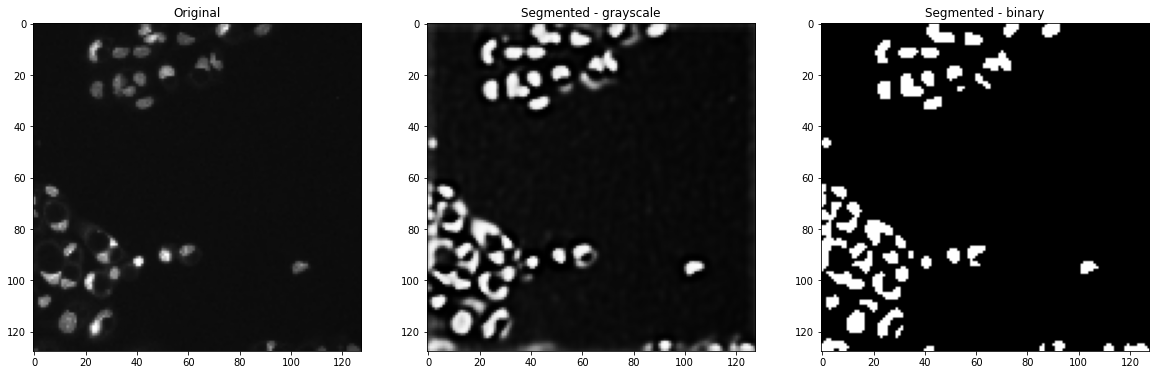

In [68]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figheight(20)
fig.set_figwidth(20)

ax1.set_title('Original')
ax1.imshow(np.squeeze(X_test[10:11]), cmap='gray')

ax2.set_title('Segmented - grayscale')
ax2.imshow(np.squeeze(m1), cmap='gray')

ax3.set_title('Segmented - binary')
ax3.imshow(np.squeeze(prediciton_t), cmap='gray')

plt.show()